In [29]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [34]:
def getWeekStart(dt):
    return dt - timedelta(days=dt.weekday())

def getMonthStart(dt):
    return dt.replace(day=1)

In [35]:
csv_path = 'cibc.csv'
colnames=['date', 'description', 'CR', 'DB', 'acc'] 
df = pd.read_csv(csv_path, names=colnames)
df["date"] = pd.to_datetime(df['date'])
df["week"] = df["date"].apply(lambda x: getWeekStart(x))
df["month"] = df["date"].apply(lambda x: getMonthStart(x))

weekSums = df.groupby(["week"]).sum()
monthSum = df.groupby(["month"]).sum()
monthSum

,CR,DB
month,,
2020-02-01,280.95,60.00
2020-03-01,422.25,639.67
2020-04-01,408.45,393.28
2020-05-01,253.52,52.00
2020-06-01,626.50,646.71
2020-07-01,449.71,649.72
2020-08-01,531.70,447.58
2020-09-01,546.51,380.93
2020-10-01,609.09,450.17


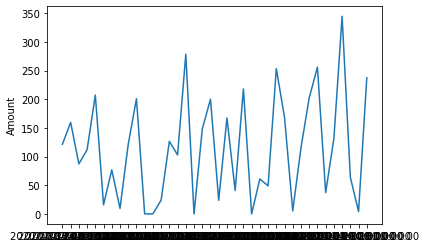

In [32]:
xLabels = [str(date) for date in weekSums.index.to_list()]
crValues = weekSums["CR"].values
dbValues = weekSums["DB"].values

xLabels
plt.plot(xLabels, crValues)
plt.ylabel('Amount')
plt.show()

In [48]:
df1 = pd.DataFrame({'a': [1,2,3], 'b':['a1', 'b1', 'c1']})

In [49]:
one_hot = pd.get_dummies(df1['b'])

In [50]:
type(one_hot)

pandas.core.frame.DataFrame

In [51]:
result = pd.concat([df1, one_hot], axis=1)

In [52]:
result

,a,b,a1,b1,c1
0,1,a1,1,0,0
1,2,b1,0,1,0
2,3,c1,0,0,1
